## K Means with elbow method

The idea is to repeat the explanatory exercise but this time using the _elbow method_ to choose the best K value

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's create fake blobs

In [82]:
from sklearn.datasets import make_blobs

In [83]:
data = make_blobs(n_samples=500, cluster_std=1.8, centers=4)
# By default has 2 features (easy to plot)

In [84]:
data[0].shape

(500, 2)

In [85]:
# We get labes for free, but remember this is unsupervised learning algorithm
data[1]

array([3, 1, 0, 2, 2, 2, 1, 1, 1, 3, 0, 1, 0, 2, 3, 2, 3, 2, 1, 2, 3, 0,
       0, 1, 0, 1, 0, 3, 3, 1, 1, 1, 2, 3, 3, 1, 0, 1, 2, 0, 1, 0, 0, 3,
       3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 1, 2, 1, 3, 3, 1, 2, 2, 2, 2, 3, 3,
       3, 0, 1, 3, 0, 1, 0, 2, 2, 2, 1, 1, 2, 3, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 2, 1, 0, 3, 2, 0, 0, 0, 3, 1, 3, 1, 3, 3, 1, 2, 2, 1, 1, 2,
       3, 0, 2, 2, 0, 3, 0, 2, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 1, 1, 0, 0,
       1, 3, 0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 3, 3, 2, 1, 0, 2,
       2, 2, 1, 3, 2, 3, 0, 3, 0, 2, 3, 3, 2, 0, 3, 3, 0, 2, 2, 3, 3, 1,
       0, 1, 0, 2, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 0, 1, 3, 1, 1, 1, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 2, 3,
       3, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 3, 1, 0,
       0, 1, 1, 1, 1, 3, 2, 2, 3, 0, 0, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 3, 3, 0, 2, 3, 0, 3, 0, 3, 0, 3,
       1, 0, 3, 0, 1, 3, 0, 0, 2, 0, 3, 0, 1, 3, 0,

Let's visualize

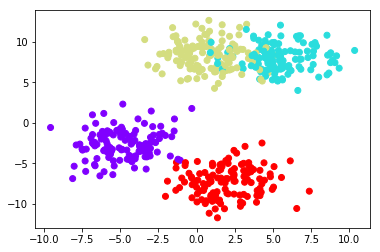

In [86]:
plt.scatter(x=data[0][:,0], y=data[0][:,1], c=data[1], cmap='rainbow')

There are three clear clusters, but let's use the **Elbow method** to find this out

In [87]:
import numpy as np
from sklearn.cluster import KMeans

In [88]:
sse = []

# Let's try for K = 2, 3, 4, 5, 6, 7, 8
for i in range(2, 9):    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[0])        
    sse.append(kmeans.inertia_)


In [89]:
sse

[8701.33262801177,
 4544.377473706017,
 2871.957006767888,
 2544.0133187686147,
 2309.205163141657,
 2023.5303977052195,
 1818.0682317746314]

Text(0,0.5,'Error Rate')

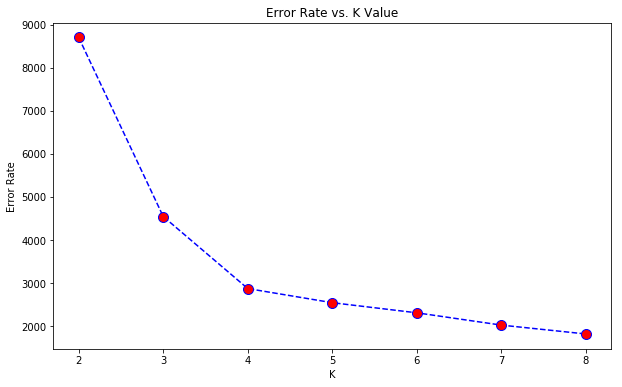

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 9), sse, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

_As we can see, the optimal K value is 4, which is where we stop getting a significan improvement in the error rate_

In [91]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

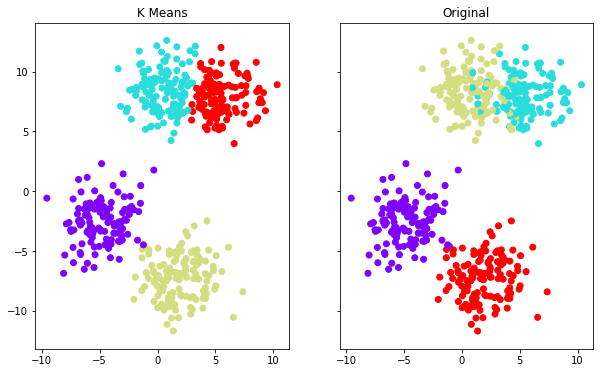

In [92]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

K means is doing a great job, as you can see :-)

**Note:** don't mind the colors